# Q-learning

$$ G_t = r_{t+1} + \gamma \max_{a}[Q(s_{t+1},a)] $$

# SARSA(State-Action-Reward-State-Action)

$$ G_t = r_{t+1} + \gamma Q(s_{t+1},a_{t+1}) $$
ただし、policy($=\pi$) について $$ a_{t+1} = \pi(s_{t+1}) $$

In [ ]:
import gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.Q = {}
        self.initialize()
        self.reward_log = []
    
    def initialize(self):
        for s in range(self.env.nS):
            self.Q[s] = [0] * self.env.nA#すべての状態に対する報酬を0として初期化する
        self.env.reset()

    def policy(self, s, epsilon = 0.1):
        if np.random.random() < epsilon:
            return np.random.randint(self.env.nA)
        else:
            if sum(self.Q[s]) == 0:
                return np.random.randint(self.env.nA)
            else:
                return np.argmax(self.Q[s])

    def montecarlo(self, episode_count=1000, gamma=0.9, alpha=0.8):
        for e in range(episode_count):
            env.reset()
            done = False
            experience_log = []   
            s = 0 
            while not done:
                a = self.policy(s)
                next_s, reward, done , _ = self.env.step(a)
                experience_log.append({'state':s, 'action':a, 'reward':reward})
                s = next_s
            else:
                self.reward_log.append(reward)
            
            for t , experience in enumerate(experience_log):
                G = 0
                i = 0
                for j in range(t, len(experience_log)):
                    G += (gamma**i)*experience_log[j]['reward']
                    i += 1
                s = experience['state']
                a = experience['action']
                self.Q[s][a] += alpha*(G - self.Q[s][a])
        return self.reward_log
    
    def q_learning(self, episode_count=1000, gamma=0.9, alpha=0.8):
        for e in range(episode_count):
            env.reset()
            done = False  
            s = 0 
            while not done:
                a = self.policy(s)
                next_s, reward, done , _ = self.env.step(a)
                G = reward + gamma * max(self.Q[next_s])
                self.Q[s][a] += alpha * (G - self.Q[s][a])

                s = next_s
            else:
                self.reward_log.append(reward)

    def SARSA(self, episode_count=1000, gamma=0.9, alpha=0.8):
        for e in range(episode_count):
            env.reset()
            done = False  
            s = 0 
            a = self.policy(s)
            while not done:
                next_s, reward, done , _ = self.env.step(a)
                next_a = self.policy(next_s)
                G = reward + gamma * self.Q[next_s][next_a]
                self.Q[s][a] += alpha * (G - self.Q[s][a])

                s = next_s
                a = next_a
            else:
                self.reward_log.append(reward)


    def show_rewards(self, interval = 50):
        average_rewards = {}
        for e in range(0, len(self.reward_log), interval):
            average_rewards[e] = np.mean(self.reward_log[e:e+50])
        return pd.Series(average_rewards).plot()

In [ ]:
env = gym.make('FrozenLake-v0',is_slippery=False)

In [ ]:
env.reset()
env.step(1)

(4, 0.0, False, {'prob': 1.0})

In [ ]:
env.render()


SFFF
FHFH
FFFH
HFFG


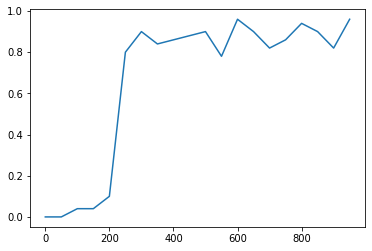

In [ ]:
agent = Agent(env)
# agent.q_learning()
# agent.show_rewards()
agent.SARSA()
agent.show_rewards()

In [ ]:
env.reset()
a = 1
next_s, reward, done , _ = env.step(a)
print(next_s)
print(reward)

4
0.0
